In [20]:
import pandas as pd
import matplotlib.pyplot as plt

fertility_rate = pd.read_csv('./data_sets/Fertility_Rate_to_Merge.csv')
endangered_languages = pd.read_csv('./data_sets/Endangered_Languages_Clean.csv')
english_proficiency = pd.read_csv('./data_sets/2017_EF_English_Proficiency.csv')
country_codes = pd.read_csv('./data_sets/country_codes.csv')

In [21]:
together = pd.merge(endangered_languages, fertility_rate, how='inner')

In [22]:
together.tail()

,Unnamed: 0,Language,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Country Name,Fertility Rate Avg
2692,2479,Sei,Sierra Leone,SLE,Extinct,0.0,7.5857,-12.5354,Sierra Leone,6.256426
2693,2370,Island Carib,Dominica,DMA,Extinct,0.0,15.4325,-61.2817,Dominica,2.888571
2694,2588,Gottscheerish,Slovenia,SVN,Critically endangered,NaN,45.6332,14.8123,Slovenia,1.768704
2695,2598,Jeju,Republic of Korea,KOR,Critically endangered,NaN,33.3671,126.4974,"Korea, Rep.",2.622148
2696,2673,Scanian,"Denmark, Sweden",DNK,Vulnerable,NaN,55.7240,13.6614,Denmark,1.858889


In [23]:
degree = together.groupby('Degree of Endangerment')

In [24]:
severely_endangered = degree.get_group('Severely endangered')

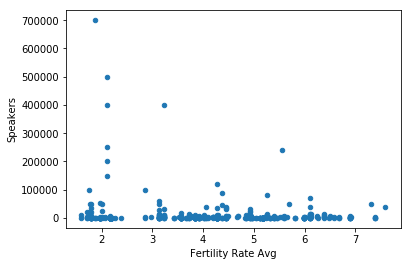

In [25]:
severely_endangered.plot(kind='scatter', y='Speakers', x='Fertility Rate Avg')
plt.show()

In [26]:
english_proficiency.head()

,Unnamed: 0,2018 Rank,Country,2018 Score,2018 Band
0,0,1,Sweden,70.72,Very High Proficiency
1,1,2,Netherlands,70.31,Very High Proficiency
2,2,3,Singapore,68.63,Very High Proficiency
3,3,4,Norway,68.38,Very High Proficiency
4,4,5,Denmark,67.34,Very High Proficiency


In [27]:
 fertility_rate.head()

,Country Name,Country Code,Fertility Rate Avg
0,Aruba,ABW,2.481593
1,Andorra,AND,1.216000
2,Afghanistan,AFG,7.382833
3,Angola,AGO,7.016759
4,Albania,ALB,3.491778


In [42]:
together_cleaner = together.drop(['Unnamed: 0'], axis=1)

In [43]:
country_codes.head()

,Unnamed: 0,Country or Area,M49 code,ISO-alpha3 code
0,0,Afghanistan,4,AFG
1,1,Åland Islands,248,ALA
2,2,Albania,8,ALB
3,3,Algeria,12,DZA
4,4,American Samoa,16,ASM


In [44]:
country_codes.columns

Index(['Unnamed: 0', 'Country or Area', 'M49 code', 'ISO-alpha3 code'], dtype='object')

In [45]:
country_codes_cleaner = country_codes.drop(['Unnamed: 0', 'M49 code'], axis=1)

In [46]:
eng_proficiency_cleaner = english_proficiency.drop(['Unnamed: 0'], axis=1)

In [48]:
together2 = pd.merge(eng_proficiency_cleaner, country_codes_cleaner, left_on='Country', right_on='Country or Area', how='inner')

In [49]:
together2

,2018 Rank,Country,2018 Score,2018 Band,Country or Area,ISO-alpha3 code
0,1,Sweden,70.72,Very High Proficiency,Sweden,SWE
1,2,Netherlands,70.31,Very High Proficiency,Netherlands,NLD
2,3,Singapore,68.63,Very High Proficiency,Singapore,SGP
3,4,Norway,68.38,Very High Proficiency,Norway,NOR
4,5,Denmark,67.34,Very High Proficiency,Denmark,DNK
5,6,South Africa,66.52,Very High Proficiency,South Africa,ZAF
6,7,Luxembourg,66.33,Very High Proficiency,Luxembourg,LUX
7,8,Finland,65.86,Very High Proficiency,Finland,FIN
8,9,Slovenia,64.84,Very High Proficiency,Slovenia,SVN
9,10,Germany,63.74,Very High Proficiency,Germany,DEU


In [50]:
together2.columns

Index(['2018 Rank', 'Country', '2018 Score', '2018 Band', 'Country or Area',
       'ISO-alpha3 code'],
      dtype='object')

In [51]:
together2_minus_dups = together2.drop(['Country or Area'], axis=1)

In [52]:
final = pd.merge(together_cleaner, together2_minus_dups, left_on='Country Code', right_on='ISO-alpha3 code', how='outer')

In [53]:
final

,Language,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Country Name,Fertility Rate Avg,2018 Rank,Country,2018 Score,2018 Band,ISO-alpha3 code
0,South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
1,Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
2,Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
3,Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
4,Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
5,Campidanese,Italy,ITA,Definitely endangered,900000.0,39.2991,8.9868,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
6,Friulian,Italy,ITA,Definitely endangered,600000.0,46.1037,13.1396,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
7,Logudorese,Italy,ITA,Definitely endangered,400000.0,40.1116,9.1845,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
8,Sassarese,Italy,ITA,Definitely endangered,120000.0,40.6139,8.6132,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA
9,Gallurese,Italy,ITA,Definitely endangered,100000.0,40.8802,9.4482,Italy,1.714074,34.0,Italy,55.77,Moderate Proficiency,ITA


In [54]:
final.columns

Index(['Language', 'Countries Where Spoken', 'Country Code',
       'Degree of Endangerment', 'Speakers', 'Latitude', 'Longitude',
       'Country Name', 'Fertility Rate Avg', '2018 Rank', 'Country',
       '2018 Score', '2018 Band', 'ISO-alpha3 code'],
      dtype='object')

In [60]:
endangered_lang_potential_final = final.drop(['Country', 'Country Name', 'ISO-alpha3 code'], axis=1)

In [61]:
endangered_lang_potential_final

,Language,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band
0,South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,1.714074,34.0,55.77,Moderate Proficiency
1,Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,1.714074,34.0,55.77,Moderate Proficiency
2,Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273,1.714074,34.0,55.77,Moderate Proficiency
3,Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739,1.714074,34.0,55.77,Moderate Proficiency
4,Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662,1.714074,34.0,55.77,Moderate Proficiency
5,Campidanese,Italy,ITA,Definitely endangered,900000.0,39.2991,8.9868,1.714074,34.0,55.77,Moderate Proficiency
6,Friulian,Italy,ITA,Definitely endangered,600000.0,46.1037,13.1396,1.714074,34.0,55.77,Moderate Proficiency
7,Logudorese,Italy,ITA,Definitely endangered,400000.0,40.1116,9.1845,1.714074,34.0,55.77,Moderate Proficiency
8,Sassarese,Italy,ITA,Definitely endangered,120000.0,40.6139,8.6132,1.714074,34.0,55.77,Moderate Proficiency
9,Gallurese,Italy,ITA,Definitely endangered,100000.0,40.8802,9.4482,1.714074,34.0,55.77,Moderate Proficiency


In [62]:
endangered_lang_potential_final = endangered_lang_potential_final.dropna(axis=0, subset=['Language'])

In [63]:
endangered_lang_potential_final

,Language,Countries Where Spoken,Country Code,Degree of Endangerment,Speakers,Latitude,Longitude,Fertility Rate Avg,2018 Rank,2018 Score,2018 Band
0,South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490,1.714074,34.0,55.77,Moderate Proficiency
1,Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019,1.714074,34.0,55.77,Moderate Proficiency
2,Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273,1.714074,34.0,55.77,Moderate Proficiency
3,Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739,1.714074,34.0,55.77,Moderate Proficiency
4,Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662,1.714074,34.0,55.77,Moderate Proficiency
5,Campidanese,Italy,ITA,Definitely endangered,900000.0,39.2991,8.9868,1.714074,34.0,55.77,Moderate Proficiency
6,Friulian,Italy,ITA,Definitely endangered,600000.0,46.1037,13.1396,1.714074,34.0,55.77,Moderate Proficiency
7,Logudorese,Italy,ITA,Definitely endangered,400000.0,40.1116,9.1845,1.714074,34.0,55.77,Moderate Proficiency
8,Sassarese,Italy,ITA,Definitely endangered,120000.0,40.6139,8.6132,1.714074,34.0,55.77,Moderate Proficiency
9,Gallurese,Italy,ITA,Definitely endangered,100000.0,40.8802,9.4482,1.714074,34.0,55.77,Moderate Proficiency


In [64]:
endangered_lang_potential_final.to_csv('./data_sets/endangered_languages_potential_final.csv')